In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
rain = pd.read_csv('pr_1991_2016_PAK.csv').iloc[:,:-2]

In [3]:
temp = pd.read_csv('tas_1991_2016_PAK.csv').iloc[:,:-2]

In [4]:
temp.columns = [i.strip() for i in temp.columns]
rain.columns = [i.strip() for i in rain.columns]

In [5]:
rain['Statistics'] = rain['Statistics'].apply(lambda x:x.split()[0])
temp['Statistics'] = temp['Statistics'].apply(lambda x:x.split()[0])

In [19]:
rain_monthwise = [(i, rain[rain['Statistics'] == i][rain.columns[0]].mean()) for i in rain['Statistics'].unique()]

In [24]:
temp_monthwise = [(i, temp[temp['Statistics'] == i][temp.columns[0]].mean()) for i in temp['Statistics'].unique()]

In [32]:
df = pd.merge(pd.DataFrame(rain_monthwise, columns=['Month', 'Rain(MM)']), 
         pd.DataFrame(temp_monthwise, columns=['Month', 'Temperature(Celcius)']), on='Month')

In [34]:
df=df.set_index('Month')

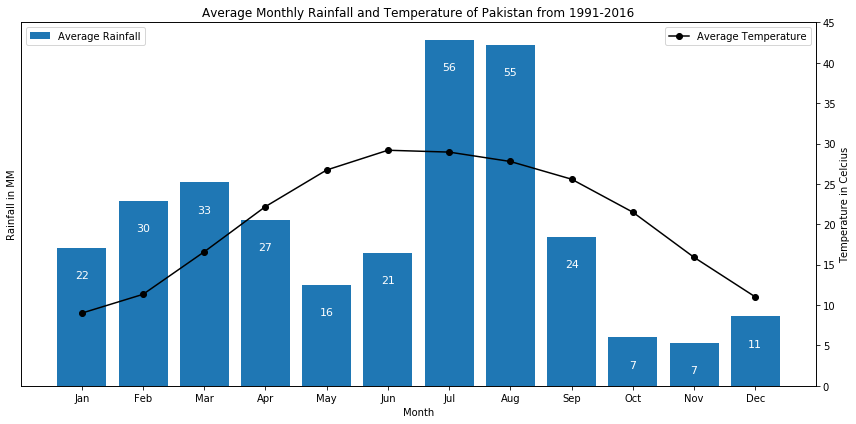

In [102]:
fig,ax1 = plt.subplots(figsize=(12,6))
bars = ax1.bar(df.index, df['Rain(MM)'], label='Average Rainfall')
ax1.set_ylabel('Rainfall in MM')
ax1.set_xlabel('Month')
ax1.legend(loc=2)

ax1.set_yticks([])

for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height()-5 , str(int(height)), 
                 ha='center', color='w', fontsize=11)

ax2 = ax1.twinx()
ax2.plot(df.index, df['Temperature(Celcius)'],'-o', color='k', label='Average Temperature')
ax2.set_ylabel('Temperature in Celcius')
ax2.set_yticks(np.arange(0,48,5))
ax2.legend(loc=1)


plt.title('Average Monthly Rainfall and Temperature of Pakistan from 1991-2016')
plt.tight_layout()